Create count table for each comparison

In [3]:
import re
import pandas as pd


comp_files = {
    'Th17.Bulk.00hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt'],
    
    'Th17.Bulk.02hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.02hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.02hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.02hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.02hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th17.Bulk.16hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.16hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.16hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.16hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.16hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th17.Bulk.24hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.24hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.24hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.24hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.24hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'Th17.Bulk.48hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.48hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.48hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.48hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.48hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt'
    ], 
    
    'Th17.Bulk.72hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Bulk.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Bulk.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Bulk.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Bulk.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'pTh17.Bulk.00hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.00hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.00hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.00hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.00hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt'],
    
    'pTh17.Bulk.02hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.02hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.02hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.02hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.02hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'pTh17.Bulk.16hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.16hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.16hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.16hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.16hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'pTh17.Bulk.24hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.24hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.24hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.24hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.24hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'pTh17.Bulk.48hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.48hr.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.48hr.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.48hr.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.48hr.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt'
    ], 
    
    'pTh17.Bulk.72hr': [
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.72hr.Bulk.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.72hr.Bulk.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.72hr.Bulk.rep4.star2.featurecounts.counts.txt',
  '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/pTh17.72hr.Bulk.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep1.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep2.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep3.star2.featurecounts.counts.txt',
  '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.00hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.02hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.02h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.02h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.16hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.16h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.24hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.24h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.48hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.48h.rep4.star2.featurecounts.counts.txt'
    ],
    
    'mmTreg.Bulk.72hr': [
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated_bulk.72h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated_bulk.72h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated_bulk.72h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated_bulk.72h.rep4.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep1.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep2.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep3.star2.featurecounts.counts.txt',
    '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_bulk.72h.rep4.star2.featurecounts.counts.txt'
    ]
    
}

def clean_count_column(s):
    items = ['bulk', 'Bulk']
    name = '.'.join(s.split('/')[-1].split('.')[:3])
    if name.startswith('mm'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated_bulk','.Bulk').replace('h.','hr.').split('.')[:4])
        else:
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated','.Bulk').replace('h.','hr.').split('.')[:4])
        
    else:
        if any(i in s for i in items):
            split_words = '.'.join(s.split('.')[1:3])
            rev_words = '.'.join(list(reversed(s.split('.')[1:3])))
            return '.'.join(s.split('/')[-1].replace(split_words, rev_words).split('.')[:4])
        else:
            s = re.sub('17.', '17.Bulk.', s)
            return '.'.join(s.split('/')[-1].split('.')[:4])
        
        
for comp, files in comp_files.items():
    df = None
    for f in files:
        df_tmp = pd.read_csv(f, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_count_column(f)]
        if df is None:
            df = df_tmp.loc[:, ['Chr', 'Start', 'End'] + [df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')

    df.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/%s.counts.txt' % comp, sep='\t')

DE analysis using DESeq2

In [2]:
%%writefile /data/reddylab/Revathy/scripts/rnaseq_dge.deseq2_ruvseq.R
#!/usr/bin/env Rscript
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library("argparse"))

# Rewrite DESeq2 plotPCA function to specify which PC to plot
plotPCA_ = function(object, intgroup="condition", ntop=500, returnData=FALSE, pcX=1, pcY=2, ignoreReps=FALSE)
{
  # calculate the variance for each gene
  rv <- rowVars(assay(object))

  # select the ntop genes by variance
  select <- order(rv, decreasing=TRUE)[seq_len(min(ntop, length(rv)))]

  # perform a PCA on the data in assay(x) for the selected genes
  pca <- prcomp(t(assay(object)[select,]))

  # the contribution to the total variance for each component
  percentVar <- pca$sdev^2 / sum( pca$sdev^2 )

  if (!all(intgroup %in% names(colData(object)))) {
    stop("the argument 'intgroup' should specify columns of colData(dds)")
  }

  intgroup.df <- as.data.frame(colData(object)[, intgroup, drop=FALSE])
  
  # add the intgroup factors together to create a new grouping factor
  group <- if (length(intgroup) > 1) {
    factor(apply( intgroup.df, 1, paste, collapse=":"))
  } else {
    colData(object)[[intgroup]]
  }
    
  if (returnData) {
    attr(d, "percentVar") <- c(percentVar[pcX], percentVar[pcY])
    return(d)
  }
  rep <- colData(object)[['rep']]
#   rep <- row.names(colData(dds))
  if (!ignoreReps){
      # Add replicate info
#       rep <- colData(object)[['rep']]

        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, rep=rep, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group", shape="rep")) + geom_point(size=3) + 
        xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  } else {
#       batch <- as.factor(colData(object)[['batch']])
        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group")) + 
          geom_point(size=3) +
          geom_text(aes(label=rep),hjust=0, vjust=0) +
          xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  }
#     + coord_fixed()
}

# create parser object
parser <- ArgumentParser()

# specify our desired options 
# by default ArgumentParser will add an help option 
parser$add_argument("-c", "--controls", nargs="+", help="Featurecounts file for controls")
parser$add_argument("-t", "--treatments", nargs="+", help="Featurecounts file for treatments")
parser$add_argument("--counts", nargs="+", help="Count matrix (or matrices). Count columns should match controls and treatments specified")
parser$add_argument("--outdir", help="Output directory where result files will be saved.")
parser$add_argument("--lfcShrink", required=F, 
                    help="Perform effect size shrinkage (types: normal, apeglm and ashr. See Zhu, Ibrahim, and Love 2018).")
parser$add_argument("--lib-sizes", required=F, 
                    help="Use library sizes as scaling factor overwritting the default total counts per library")
parser$add_argument("--counts-skip-ncols", required=F, 
                    help="Skip n first columns from count matrix")
parser$add_argument("--counts-only-treatments-and-controls", required=F, action="store_true", default=FALSE,
                    help="Keep only the counts from the treatment and control samples (affects dispersion estimates, but can speed up things significantly)")
parser$add_argument("--no-filter", required=F, action="store_true", default=FALSE,
                    help="By default, lowly expressed regions in only 1 sample are removed. Specify if no filter should be done")
parser$add_argument("--no-model-reps", required=F, action="store_true", default=FALSE,
                    help="Ignore replicates when plotting PCA components")
parser$add_argument("--norm-by-ercc", required=F, action="store_true", default=FALSE,
                    help="Normalized using ERCC counts (probes staring by ERCC-)")
parser$add_argument("--samples-info-df", required=F, default=FALSE,
                    help="Optionally, provide a DataFrame with sample info (which in DESeq2 is used as column data)")
parser$add_argument("--control-substr", required=F, default=FALSE,
                    help="Optionally, provide a substr found in rownames to identify control counts (e.g. housekeeping genes, spike-ins, etc.). It changes the estimateSizeFactors function")
parser$add_argument("--ruv-colData", required=F, default=FALSE,
                    help="Optionally, provide a DataFrame with the RUVSeq corrected columnData")

# get command line options, if help option encountered print help and exit,
# otherwise if options not found on command line then set defaults, 
args <- parser$parse_args()
treatments <- args$treatments
controls <- args$controls
outdir <- args$outdir

ff <- args$counts
dd <- lapply(ff, read.csv, header=TRUE, sep="\t", stringsAsFactors=FALSE, row.names=1)
xx <- do.call(cbind, dd)

countData <- xx
if (!is.null(args$counts_skip_ncols)){
    countData <- xx[, -c(1:args$counts_skip_ncols)]
}

colnames(countData)[colnames(countData)%in%append(treatments, controls)]
if (args$counts_only_treatments_and_controls){
#     countData <- xx %>% select(unlist(append(treatments, controls)))
    countData <- subset(xx, select = colnames(countData)[colnames(countData)%in%append(treatments, controls)])
}

controls
treatments
samples_no_reps <- gsub("(.*)\\..*", "\\1", colnames(countData))
reps <- gsub(".*\\.(.*)", "\\1", colnames(countData))
#timepoints <- gsub(".*\\.(.*)", "\\1", samples_no_reps)
#timepoints


conditions <- gsub("(.*)\\..*", "\\1", colnames(countData))
conditions


if (args$samples_info_df){
    colData <- read.csv(args$samples_info_df, 
                        header=TRUE, sep="\t", 
                        stringsAsFactors=TRUE, row.names=1)
    colData <- colData[colnames(countData), ]
    design_formula_str <- paste(c("~ ", paste(colnames(colData), collapse = " + ")), collapse='')
    print(design_formula_str)
    dds <- DESeqDataSetFromMatrix(countData = countData,
                                  colData = colData,
                                  design = formula(design_formula_str))
} else {
    colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData)) 
    print(colData)
    if (!(args$no_model_reps)){
        print(reps)
    #     colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ rep + condition)
    } else {
    #     colData <- data.frame(condition=conditions, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ condition)
    }
} 

### if RUVSeq corrected data present

if (args$ruv_colData){
    new_colData <- merge(x = colData, y = args$ruv_colData, by = "names", all = TRUE)
    new_colData <- subset(new_colData, select = -c(rep.y, condition.y) )
    new_colData[is.na(new_colData)] <- 0
    rownames(new_colData) <- new_colData$names
    new_colData[,1] <- NULL
    
    ### match the order of rows in new colData with the columns in countData
    order <- match(rownames(new_colData), colnames(countData))
    countData_ordered  <- countData[ , order]
    print(new_colData)
    
    ddsruv <- DESeqDataSetFromMatrix(countData = countData_ordered, 
                                 colData = new_colData, 
                                 design = ~ W_1 + W_2 + rep.x + condition.x)
   
}



# Optionally: if lib_sizes provided, manually assigned scale factors
if (!is.null(args$lib_sizes)){
    lib_sizes <- read.table(args$lib_sizes, sep="\t", row.names=1)
    lib_sizes <- lib_sizes[colnames(countData), ]
    lib_sizes_scale_factors <- lib_sizes/min(lib_sizes)
    sizeFactors(dds) <- lib_sizes_scale_factors    
}

if (args$norm_by_ercc){
    ercc_genes <- countData[grepl("^ERCC", rownames(countData)), ]
    dds <- DESeqDataSetFromMatrix(countData = countData[!grepl("^ERCC", rownames(countData)), ],
                              colData = colData,
                              design = ~ condition)
    ercc_dds <- DESeqDataSetFromMatrix(countData = ercc_genes, 
                                       colData = colData,
                                       design = ~ condition)
    sizeFactors(dds) <-  sizeFactors(estimateSizeFactors(ercc_dds))
}

# Reorder condition comparisons to always compute log2 fold changes of treat vs control
conditions_pair <- unique(conditions)

#control <- gsub("(.*)\\..*", "\\1", control_conditions)
control_conditions <- unique(gsub("(.*)\\..*", "\\1", controls))
control_conditions


#treatment <- gsub("(.*)\\..*", "\\1", treatments)
treatment_conditions <- unique(gsub("(.*)\\..*", "\\1", treatments))
treatment_conditions


# Relevel to setup control as reference
dds$condition <- relevel(dds$condition, ref = control_conditions)

# Pre-filtering low count genes
# dds <- dds[ rowSums(counts(dds)) > 5, ]
if (!args$no_filter){
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 2, ]
}

# Run DESeq2
# dds <- DESeq(dds, betaPrior=FALSE)
if (is.character(args$control_substr)){
    control_idxs <- which(grepl(args$control_substr, rownames(dds)))
    dds <- estimateSizeFactors(dds, controlGenes=control_idxs)
} else {
    dds <- estimateSizeFactors(dds)
}
#dds <- DESeq(dds, test="LRT", reduced = ~ time + condition)
dds <- estimateDispersions(dds)
dds <- nbinomWaldTest(dds)

# rlog transformed values (typically used for clustering - see DESeq2 manual for details)
rld <- rlog(dds)
head(assay(rld))

# Calculate comparison string name 
treat_vs_contr <- paste0(treatment_conditions, '_vs_', control_conditions)

# Extracting transformed values for PCA analysis
vsd <- tryCatch({
    vst(dds, blind=FALSE)
}, error = function(e){
    varianceStabilizingTransformation(dds, blind=FALSE)
})

# Create PCA plot for the first and second PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.1_vs_2.pdf'), width=8, height=5)
plotPCA_(vsd, intgroup=c('condition'), ntop=500, pcX=1, pcY=2, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the second and third PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.2_vs_3.pdf'), width=8, height=5)
plotPCA_(vsd, intgroup=c('condition'), ntop=500, pcX=2, pcY=3, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the third and fourth PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.3_vs_4.pdf'), width=8, height=5)
plotPCA_(vsd, intgroup=c('condition'), ntop=500, pcX=3, pcY=4, ignoreReps=args$no_model_reps)
dev.off()


c('condition',  
  conditions_pair[conditions_pair %in% treatment_conditions], 
  conditions_pair[conditions_pair %in% control_conditions])
res <- results(dds, 
               contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]), 
               alpha=0.05, 
               independentFiltering=F)  # TODO: Test how the results look without independent filtering

# Print out result names
resultsNames(dds)


# Shrink log2 fold-change values?
if (!is.null(args$lfcShrink)){
    # If lfcShrinkage specified, save unshrunk values
    resOrdered <- res[order(res$padj),]
    print(resOrdered)
    # Save sorted results in a text file
    write.table(resOrdered, 
                file=paste0(outdir, '/', treat_vs_contr, '.unshrunk.txt'),
                quote = FALSE, row.names=TRUE, sep = '\t')

    # Create plot for the log2 fold changes from the treatment over the mean of normalized counts
    pdf(paste0(outdir, '/', treat_vs_contr, '.unshrunk.pdf'))
    plotMA(res, main=paste0("DESeq2_unshrunk_lfc_", treat_vs_contr), ylim=c(-4,4)) #, ylim=c(-10,10)
    dev.off()

    # Calculate lfcShrink values
    targ_contrast <- paste0("condition_", treat_vs_contr)
    print(targ_contrast)
    res <- lfcShrink(dds, 
                     coef=targ_contrast, 
                     type=args$lfcShrink)
}

# Sort by adjusted p-value (FDR)
(resOrdered <- res[order(res$padj),])

# Print out summary of results
summary(resOrdered, alpha=0.05)

# Try IHW multiple hypothesis testing package
library("IHW")
resIHW <- results(dds, 
                 alpha=0.05,
                  contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]),
                  filterFun=ihw
                 )
summary(resIHW, alpha=0.05)


# Create plot for the log2 fold changes from the treatment over the mean of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.pdf'))
plotMA(res, main=paste0("DESeq2_", treat_vs_contr), ylim=c(-4,4))#, ylim=c(-10,10)
dev.off()

# Create plot for dispersion of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.mean_counts_dispersion.pdf'))
plotDispEsts(dds)
dev.off()

# To check if there are too many outliers, plot the Cook distances 
pdf(paste0(outdir, '/', treat_vs_contr, '.cook_distances.pdf'))
par(mar=c(8,5,2,2))
boxplot(log10(assays(dds)[["cooks"]]), range=0, las=2)
dev.off()

# Save sorted results in a text file
write.table(resOrdered, 
            file=paste0(outdir, '/', treat_vs_contr, '.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save rlog transformed values
write.table(assay(rld), 
            file=paste0(outdir, '/', treat_vs_contr, '.rlog.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save .RData object
save.image(paste0(outdir, '/', treat_vs_contr, '.RData'))

###################################################################################################################
#### DESeq after RUVSeq - replicating all the analysis, tables and plots done for DESeq before RUV correction ####
##################################################################################################################

# Relevel to setup control as reference
ddsruv$condition <- relevel(ddsruv$condition, ref = control_conditions)

# Pre-filtering low count genes
# dds <- dds[ rowSums(counts(dds)) > 5, ]
if (!args$no_filter){
    ddsruv <- ddsruv[ rowSums(fpm(ddsruv, robust = FALSE)>=2) > 2, ]
}

# Run DESeq2
# dds <- DESeq(dds, betaPrior=FALSE)
if (is.character(args$control_substr)){
    control_ruv_idxs <- which(grepl(args$control_substr, rownames(ddsruv)))
    ddsruv <- estimateSizeFactors(ddsruv, controlGenes=control_ruv_idxs)
} else {
    ddsruv <- estimateSizeFactors(ddsruv)
}
#dds <- DESeq(dds, test="LRT", reduced = ~ time + condition)
ddsruv <- estimateDispersions(ddsruv)
ddsruv <- nbinomWaldTest(ddsruv)

# rlog transformed values (typically used for clustering - see DESeq2 manual for details)
rld_ruv <- rlog(ddsruv)
head(assay(rld_ruv))

# Calculate comparison string name 
treat_vs_contr <- paste0(treatment_conditions, '_vs_', control_conditions)

# Extracting transformed values for PCA analysis
vsd_ruv <- tryCatch({
    vst(ddsruv, blind=FALSE)
}, error = function(e){
    varianceStabilizingTransformation(ddsruv, blind=FALSE)
})

# Create PCA plot for the first and second PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.pca.1_vs_2.pdf'), width=8, height=5)
plotPCA_(vsd_ruv, intgroup=c('condition'), ntop=500, pcX=1, pcY=2, ignoreReps=args$no_model_reps)
dev.off()
# # Create PCA plot for the second and third PCs
# pdf(paste0(outdir, '/', treat_vs_contr, '.pca.2_vs_3.pdf'), width=8, height=5)
# plotPCA_(vsd, intgroup=c('condition'), ntop=500, pcX=2, pcY=3, ignoreReps=args$no_model_reps)
# dev.off()
# # Create PCA plot for the third and fourth PCs
# pdf(paste0(outdir, '/', treat_vs_contr, '.pca.3_vs_4.pdf'), width=8, height=5)
# plotPCA_(vsd, intgroup=c('condition'), ntop=500, pcX=3, pcY=4, ignoreReps=args$no_model_reps)
# dev.off()


c('condition',  
  conditions_pair[conditions_pair %in% treatment_conditions], 
  conditions_pair[conditions_pair %in% control_conditions])
res_ruv <- results(ddsruv, 
               contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]), 
               alpha=0.05, 
               independentFiltering=F)  # TODO: Test how the results look without independent filtering

# Print out result names
resultsNames(ddsruv)


# Shrink log2 fold-change values?
if (!is.null(args$lfcShrink)){
    # If lfcShrinkage specified, save unshrunk values
    resOrdered_ruv <- res_ruv[order(res_ruv$padj),]
    print(resOrdered_ruv)
    # Save sorted results in a text file
    write.table(resOrdered_ruv, 
                file=paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.unshrunk.txt'),
                quote = FALSE, row.names=TRUE, sep = '\t')

    # Create plot for the log2 fold changes from the treatment over the mean of normalized counts
    pdf(paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.unshrunk.pdf'))
    plotMA(res_ruv, main=paste0("DESeq2_unshrunk_lfc_ruv_corrected_", treat_vs_contr), ylim=c(-4,4)) #, ylim=c(-10,10)
    dev.off()

    # Calculate lfcShrink values
    targ_contrast <- paste0("condition_", treat_vs_contr)
    print(targ_contrast)
    res_ruv <- lfcShrink(ddsruv, 
                     coef=targ_contrast, 
                     type=args$lfcShrink)
}

# Sort by adjusted p-value (FDR)
(resOrdered_ruv <- res_ruv[order(res_ruv$padj),])

# Print out summary of results
summary(resOrdered_ruv, alpha=0.05)

# Try IHW multiple hypothesis testing package
library("IHW")
resIHW_ruv <- results(ddsruv, 
                 alpha=0.05,
                  contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]),
                  filterFun=ihw
                 )
summary(resIHW_ruv, alpha=0.05)


# Create plot for the log2 fold changes from the treatment over the mean of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.pdf'))
plotMA(res_ruv, main=paste0("DESeq2_ruv_corrected", treat_vs_contr), ylim=c(-4,4))#, ylim=c(-10,10)
dev.off()

# Create plot for dispersion of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.mean_counts_dispersion.pdf'))
plotDispEsts(ddsruv)
dev.off()

# To check if there are too many outliers, plot the Cook distances 
pdf(paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.cook_distances.pdf'))
par(mar=c(8,5,2,2))
boxplot(log10(assays(ddsruv)[["cooks"]]), range=0, las=2)
dev.off()

# Save sorted results in a text file
write.table(resOrdered_ruv, 
            file=paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save rlog transformed values
write.table(assay(rld_ruv), 
            file=paste0(outdir, '/', treat_vs_contr, '.ruv_corrected.rlog.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save .RData object
save.image(paste0(outdir, '/', treat_vs_contr, '.RData'))

Writing /data/reddylab/Revathy/scripts/rnaseq_dge.deseq2_ruvseq.R


DE analysis for each time point

In [7]:
%%bash
mkdir -p /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -pnew,all \
    --array=0-1 \
    --mem 16G \
    -o /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries.%a.out \
    <<'EOF'
#!/bin/bash
COMPARISONS=( \
     Th1.Bulk.00hr-mmTh0.Bulk.00hr \ 
     Th1.Bulk.02hr-mmTh0.Bulk.02hr \
     Th1.Bulk.16hr-mmTh0.Bulk.16hr \
     Th1.Bulk.24hr-mmTh0.Bulk.24hr \ 
     Th1.Bulk.48hr-mmTh0.Bulk.48hr \
     Th1.Sorted.72hr-mmTh0.Sorted.72hr \
     Th2.Bulk.00hr-mmTh0.Bulk.00hr \ 
     Th2.Bulk.02hr-mmTh0.Bulk.02hr \
     Th2.Bulk.16hr-mmTh0.Bulk.16hr \
     Th2.Bulk.24hr-mmTh0.Bulk.24hr \ 
     Th2.Bulk.48hr-mmTh0.Bulk.48hr \
     Th2.Sorted.72hr-mmTh0.Sorted.72hr 
)

COMPARISON=${COMPARISONS[${SLURM_ARRAY_TASK_ID}]}
TREAT=$(echo $COMPARISON | cut -d"-" -f1)
CONTROL=$(echo $COMPARISON | cut -d"-" -f2)
FACTOR=$(echo $COMPARISON | cut -d"-" -f1)
Rscript /data/reddylab/Revathy/dev/scripts/rnaseq_dge.deseq2_v2.R \
    --treatments $(echo ${TREAT}.rep{1,2,3,4}) \
    --controls $(echo ${CONTROL}.rep{1,2,3,4}) \
    --lfcShrink ashr \
    --counts-skip-ncols 3 \
    --outdir /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries \
    --counts /data/reddylab/Revathy/dev/rna-seq_Siklenka/${FACTOR}.counts.txt
    
EOF


Submitted batch job 22955248


In [9]:
%%bash
FDR=0.05
COMPARISONS=( \ 
     #Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     #Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     #Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     #Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     #Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     #Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr \
     #pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     #pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     #pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     #pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     #pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     #pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr \
     mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     mmTreg.Bulk.72hr_vs_mmTh0.Bulk.72hr
)
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.txt |  cut -d. -f1 > ${COMP}.expressed_genes.txt 
    
    # Save significant upreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3>0)){print $1}}' |  cut -d. -f1 > ${COMP}.upreg_genes.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3<0)){print $1}}' |  cut -d. -f1 > ${COMP}.downreg_genes.txt 

done



In [10]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

In [11]:
%%bash
FDR=0.05
COMPARISONS=( \
     #Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     #Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     #Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     #Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     #Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     #Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr \
     #pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     #pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     #pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     #pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     #pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     #pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr
     mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr \ 
     mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr \
     mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr \
     mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr \ 
     mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr \
     mmTreg.Bulk.72hr_vs_mmTh0.Bulk.72hr
)
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.with_genes.txt |  awk '{print $NF}' > ${COMP}.expressed_genes.symbols.txt 

    # Save significant upreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3>0)){print $NF}}' > ${COMP}.upreg_genes.symbols.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3<0)){print $NF}}' > ${COMP}.downreg_genes.symbols.txt 

done



In [12]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
module load ImageMagick/7.0.1-gcb01
for ii in $(/bin/ls -1 *.pdf);
do
    convert ${ii} ${ii/.pdf/.png}
done

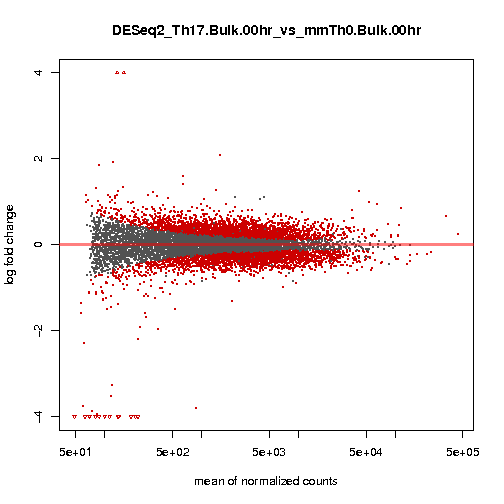

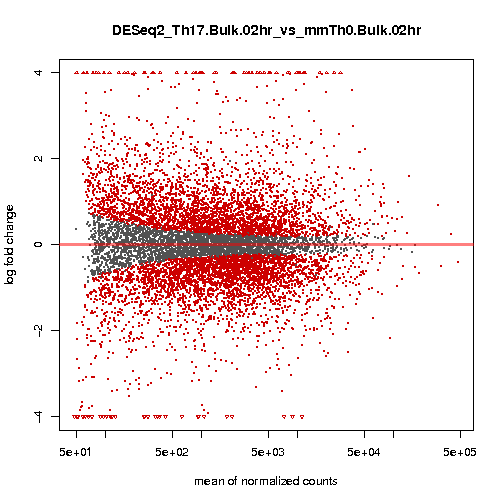

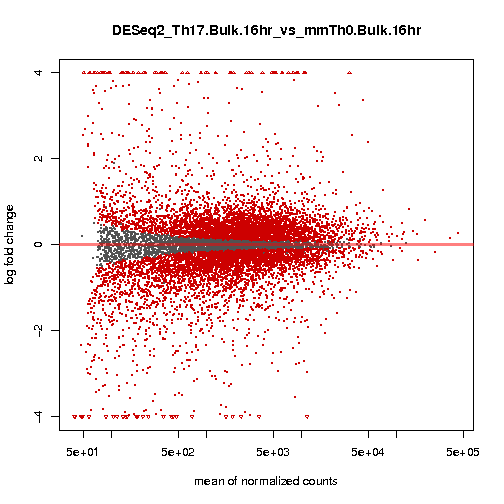

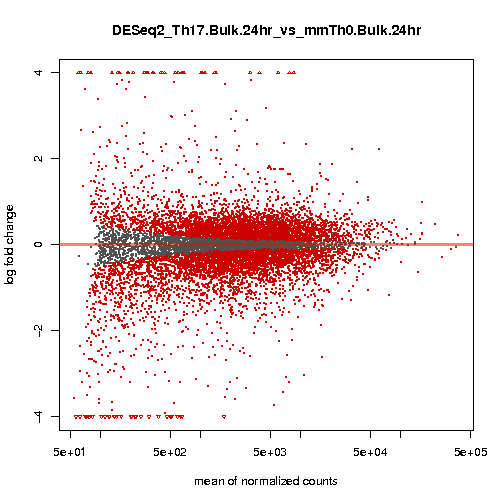

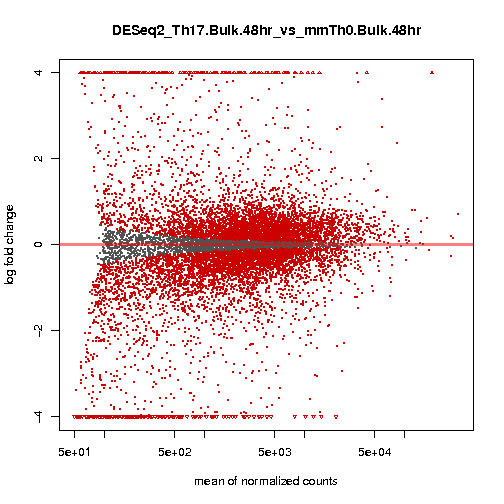

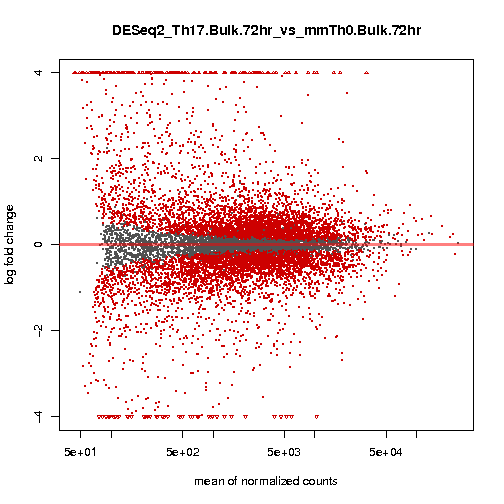

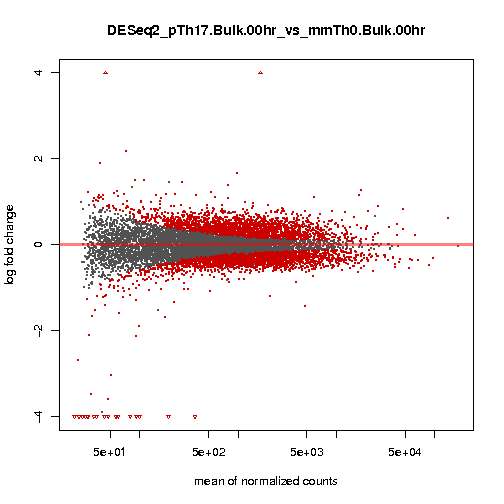

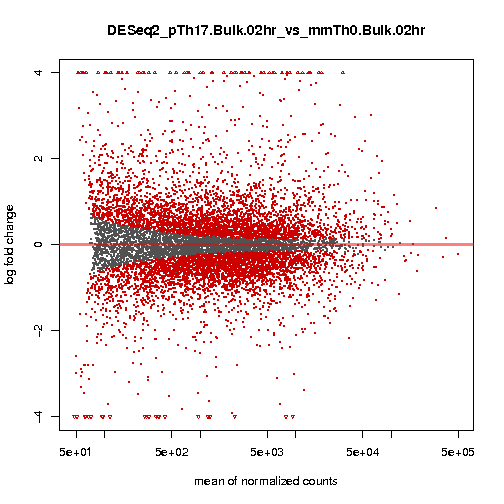

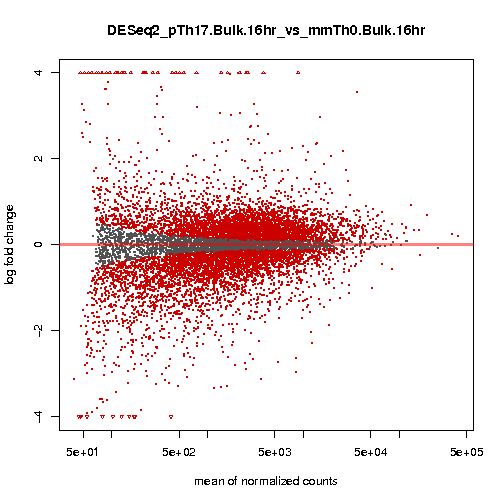

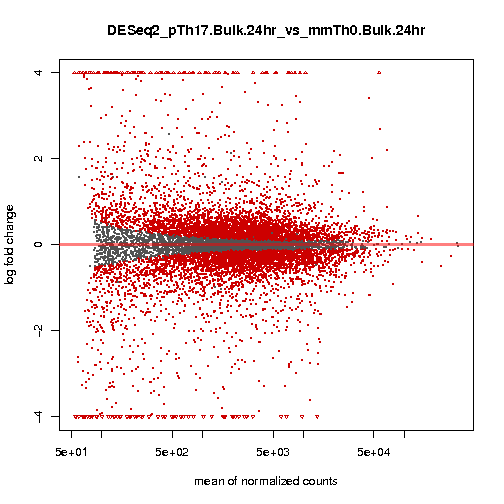

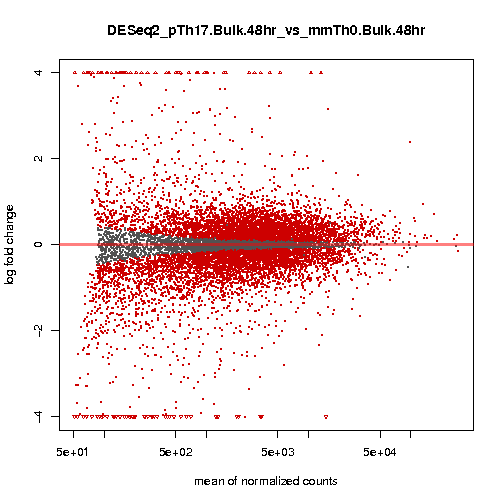

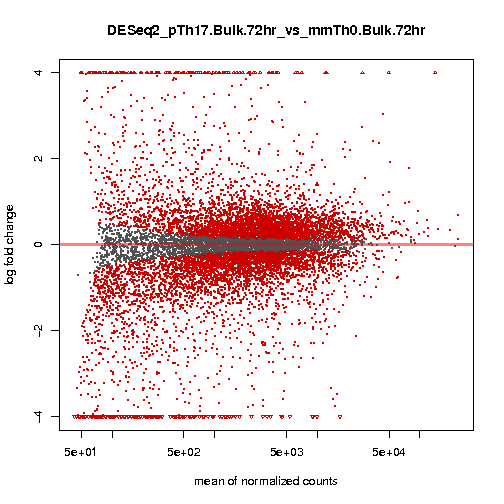

In [27]:
from IPython.display import display, Image
COMPARISONS=[
     #'Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     #'Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     #'Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     #'Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     #'Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     #'Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr',
     #'pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     #'pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     #'pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     #'pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr',  
     #'pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     #'pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr'
     'mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr', 
     'mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr', 
     'mmTreg.Bulk.72hr_vs_mmTh0.Bulk.72hr'
    ]
for c in COMPARISONS:
    display(Image("/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/%s.png" % c))

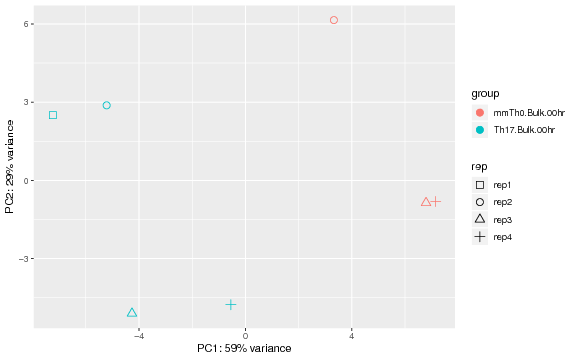

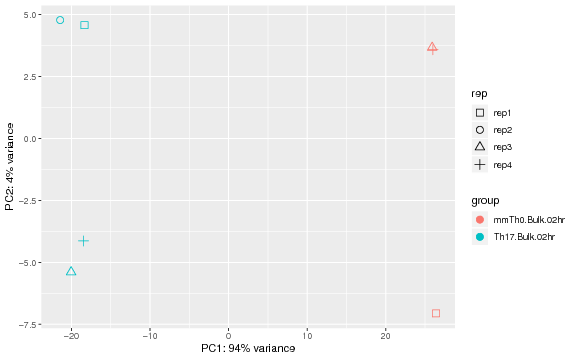

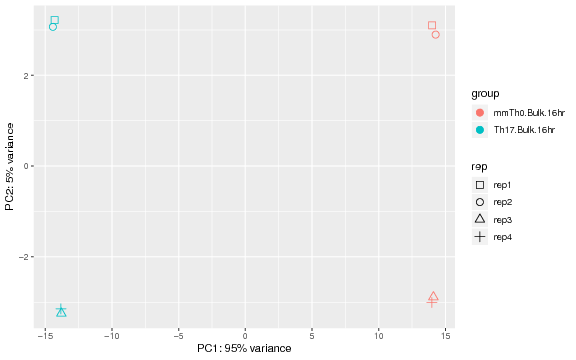

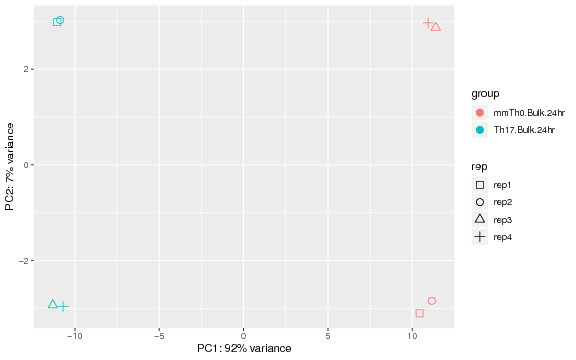

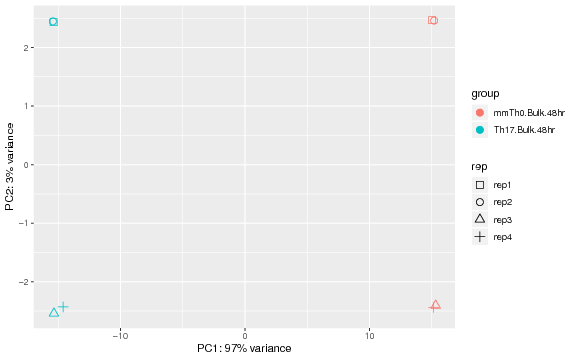

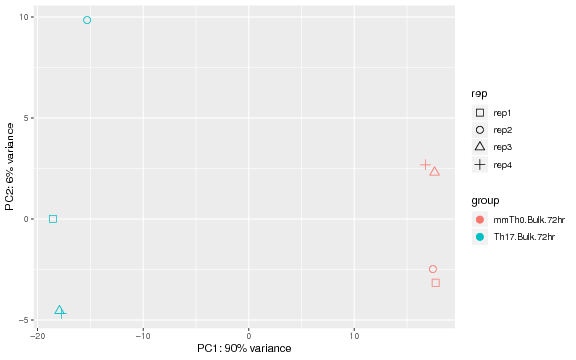

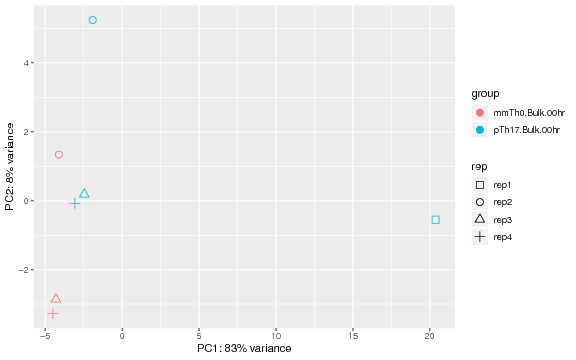

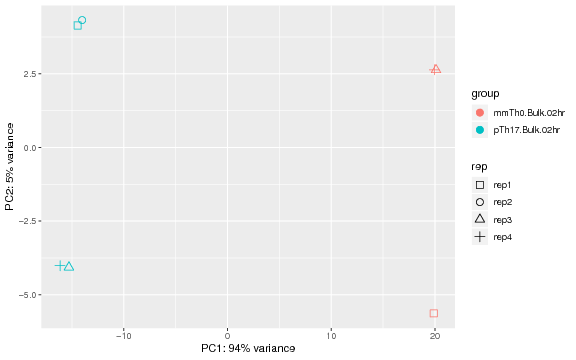

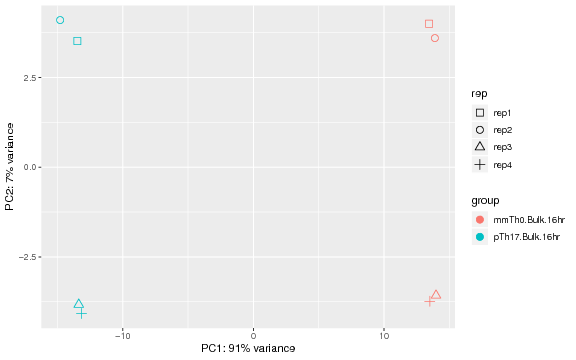

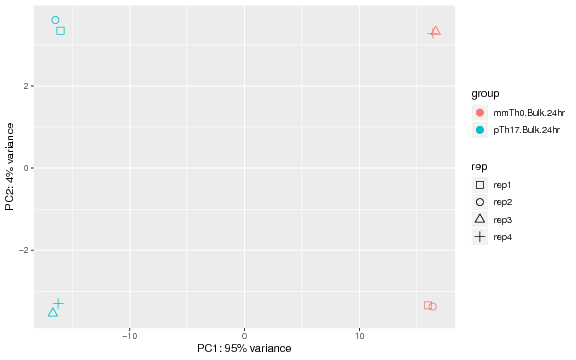

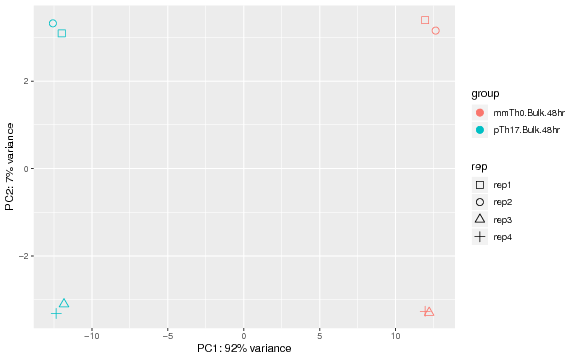

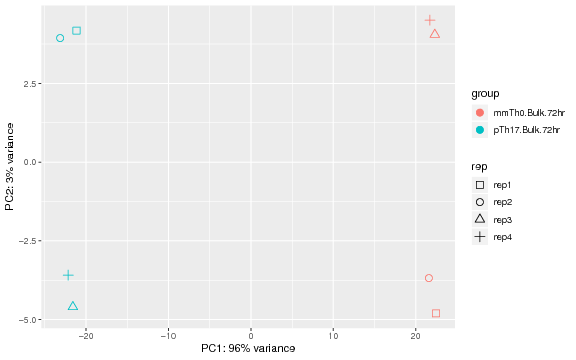

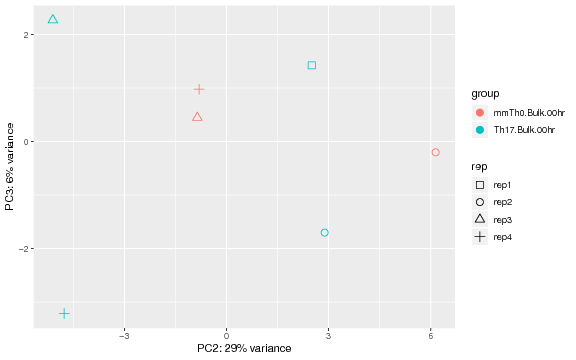

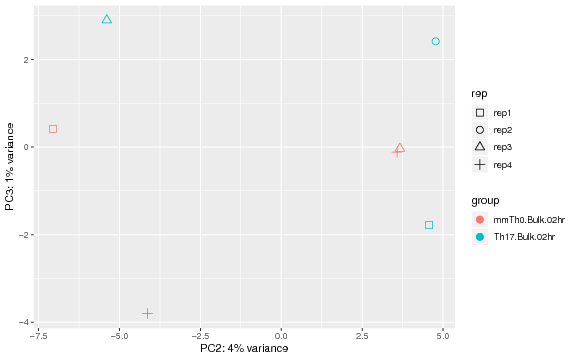

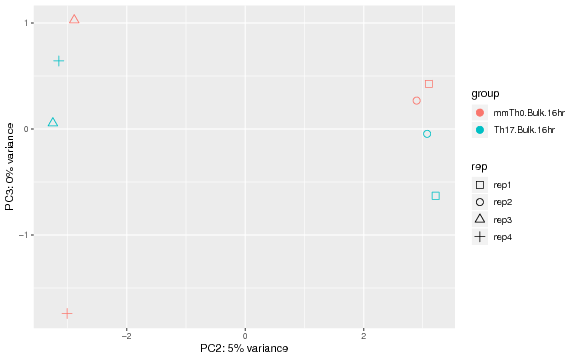

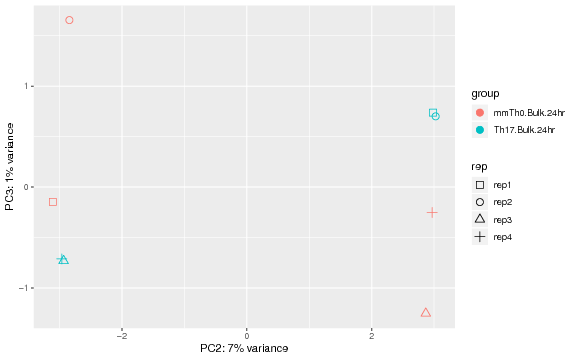

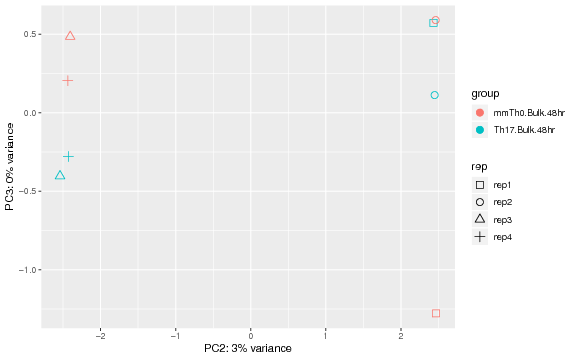

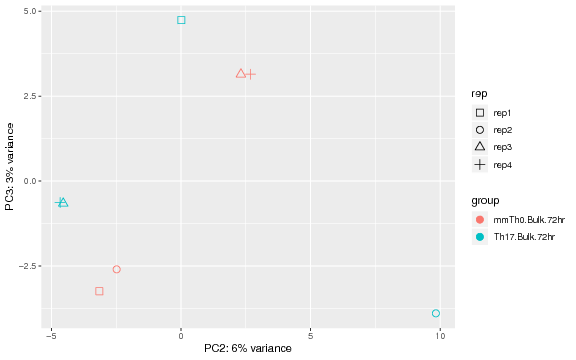

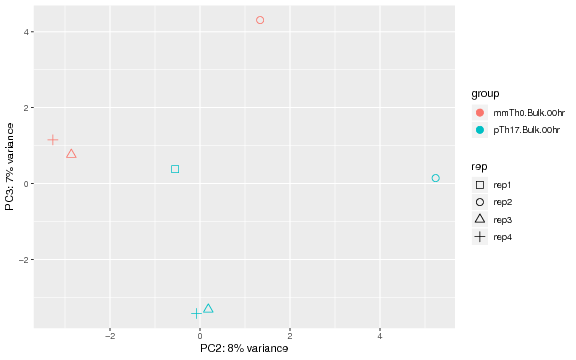

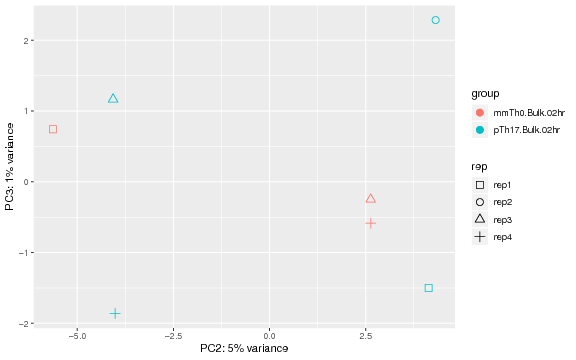

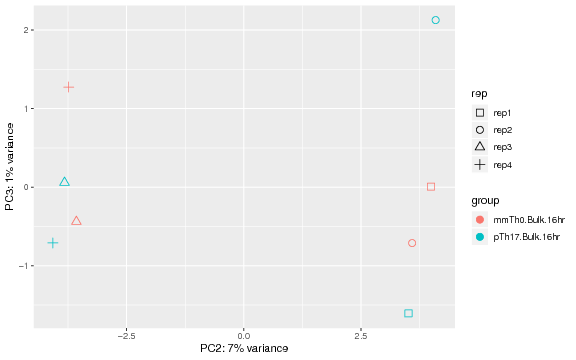

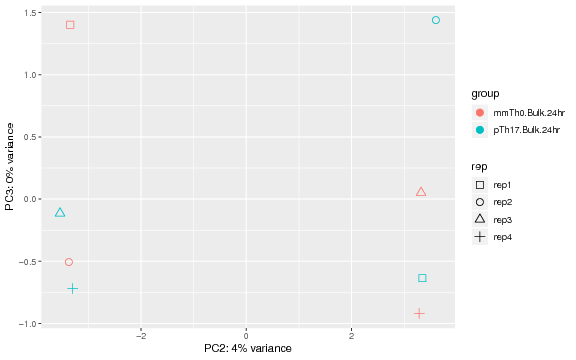

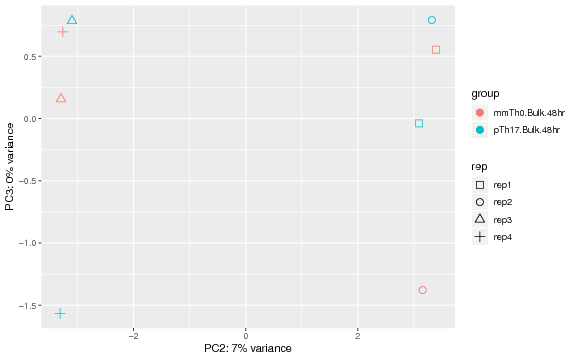

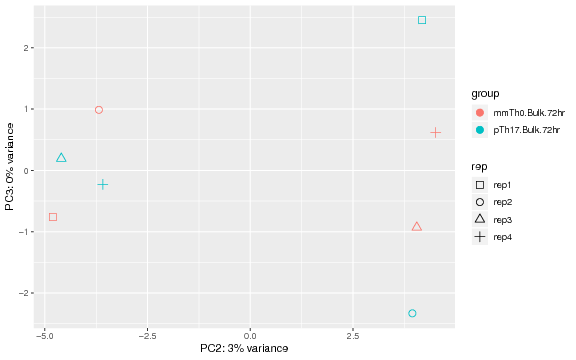

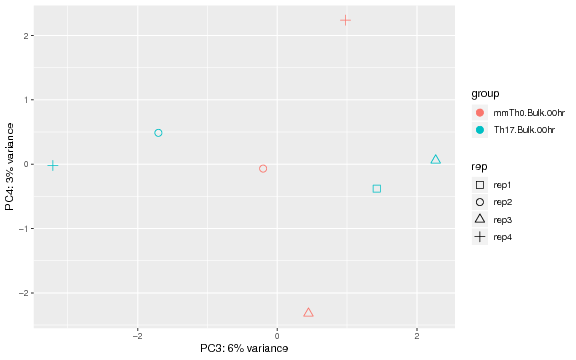

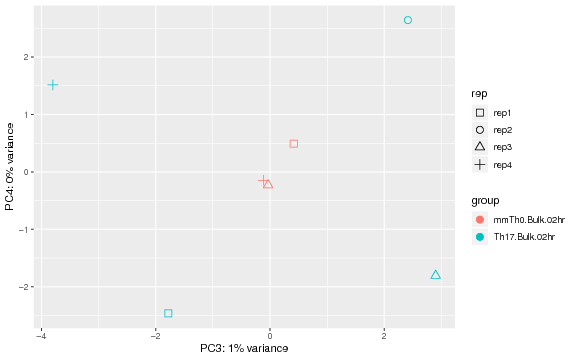

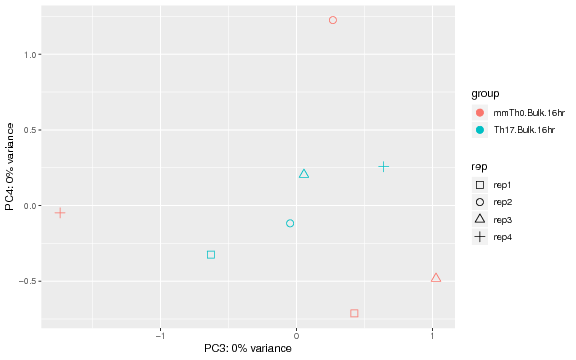

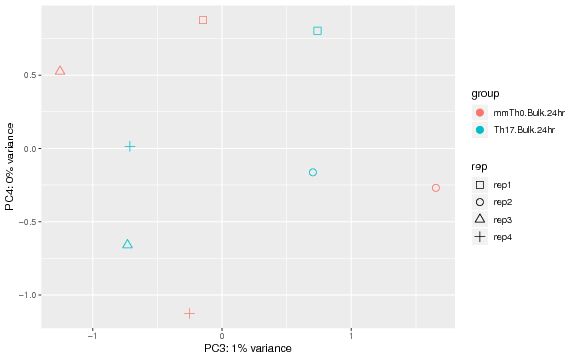

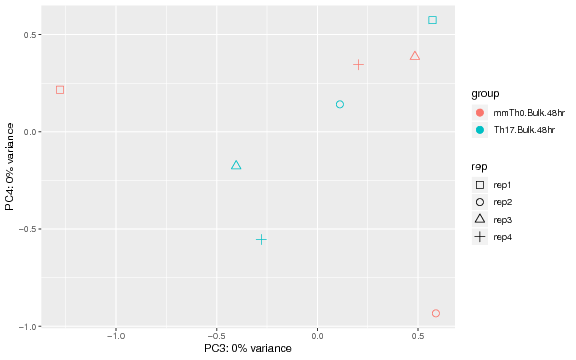

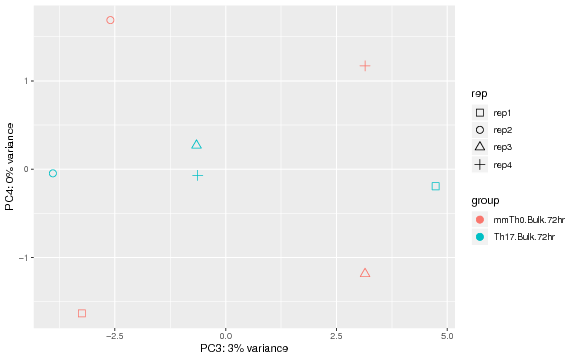

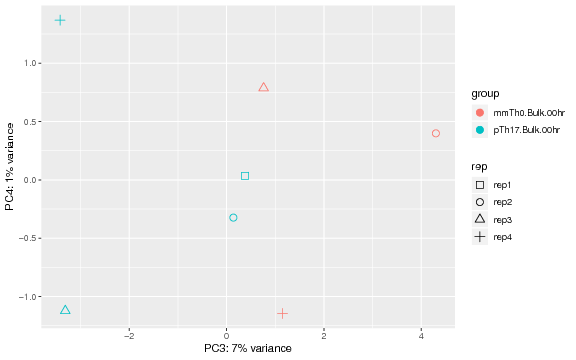

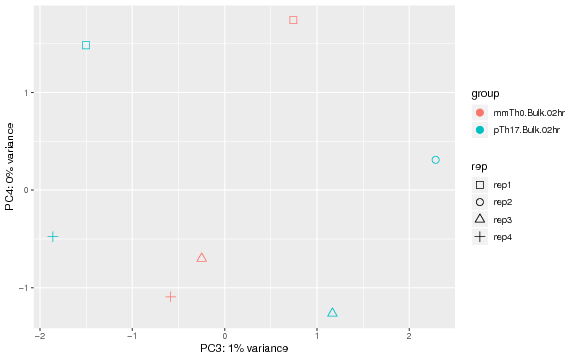

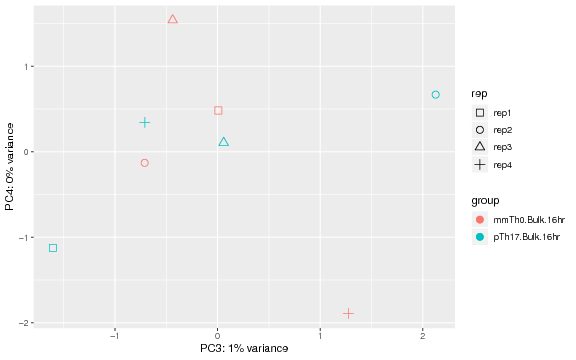

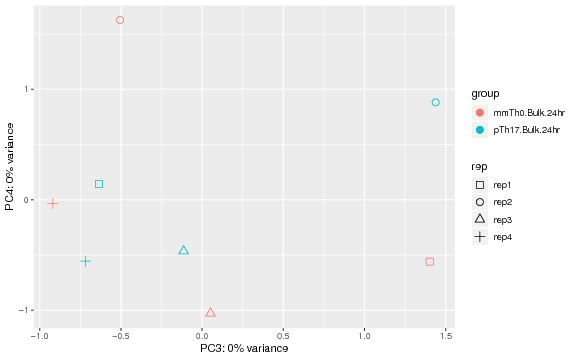

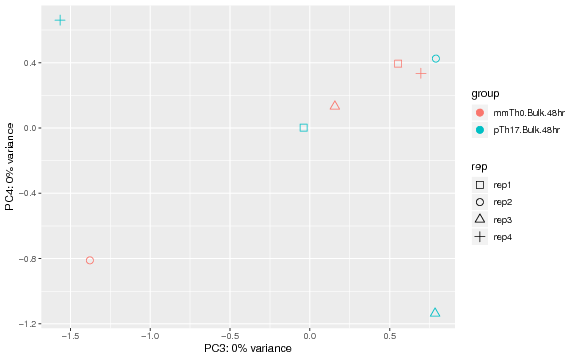

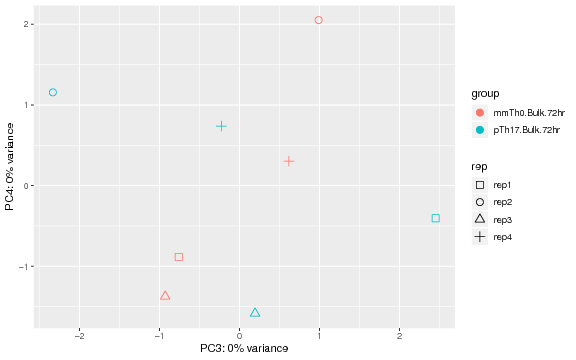

In [1]:
from IPython.display import display, Image
COMPARISONS=[
     'Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr',
     'pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     'pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr',  
     'pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr'
    ]
PC = [
    'pca.1_vs_2',
    'pca.2_vs_3',
    'pca.3_vs_4'
]

for p in PC:
    for comp in COMPARISONS:
         display(Image("/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/%s.%s.png" % (comp, p)))

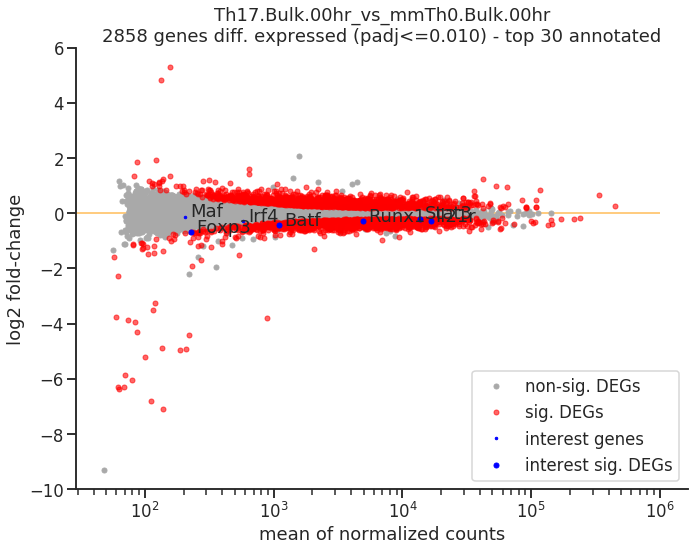

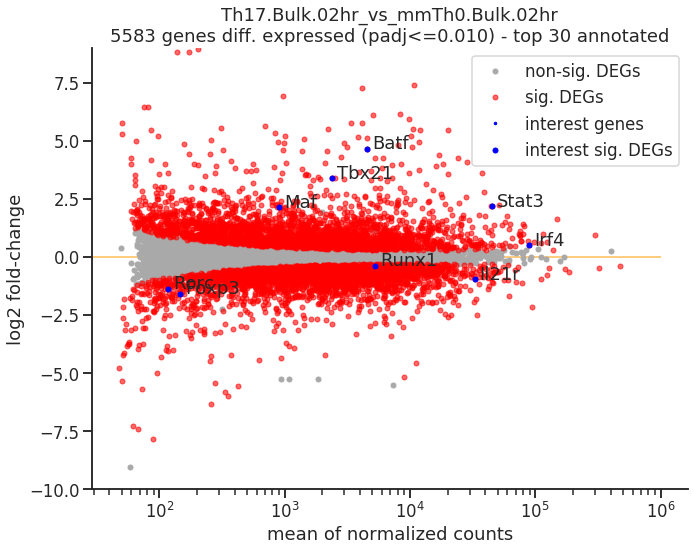

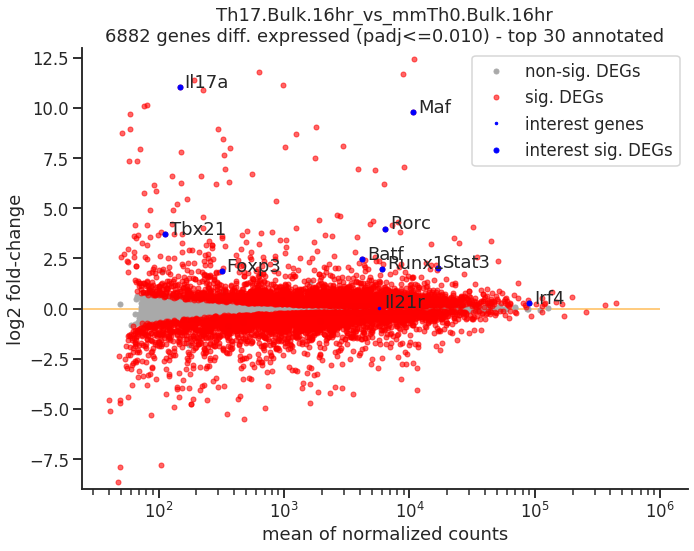

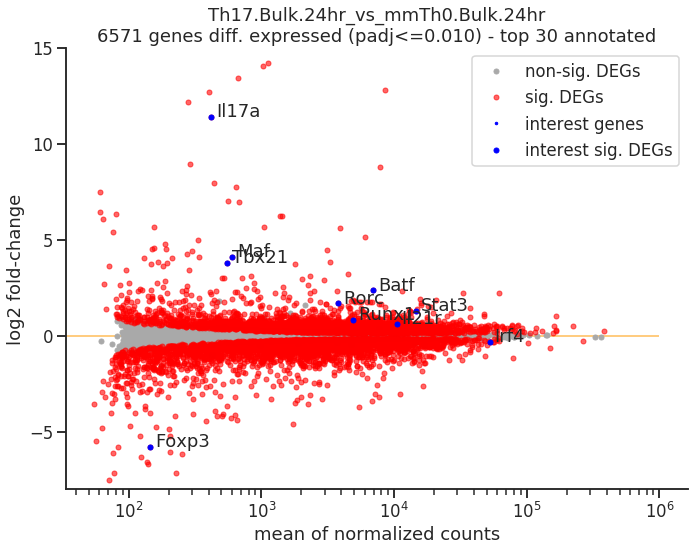

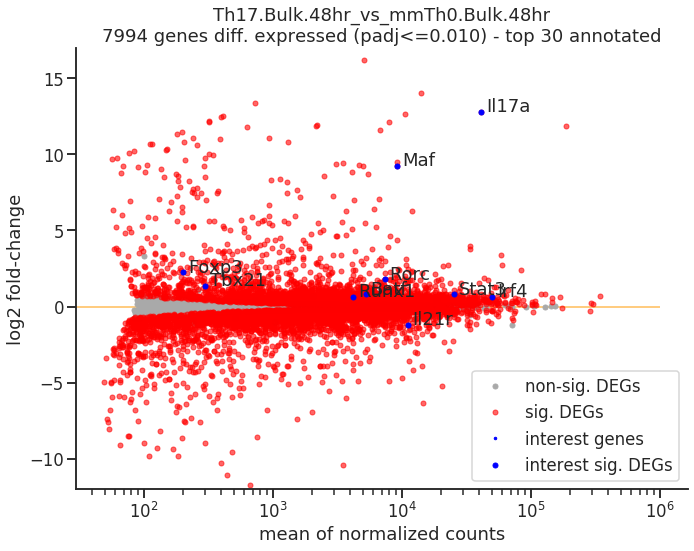

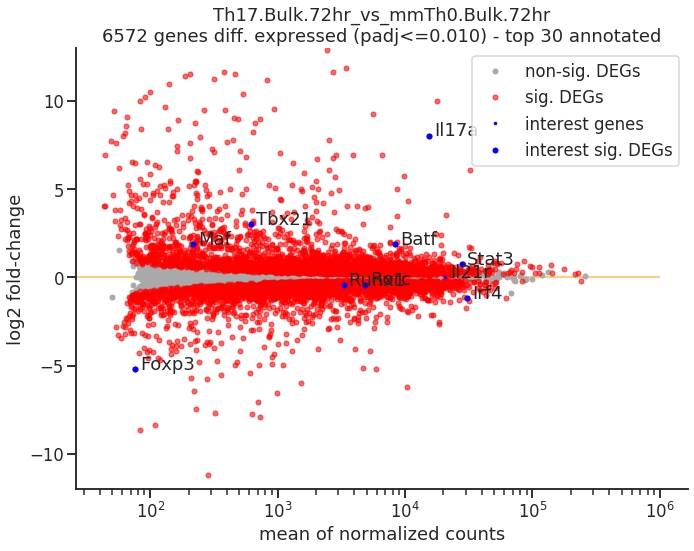

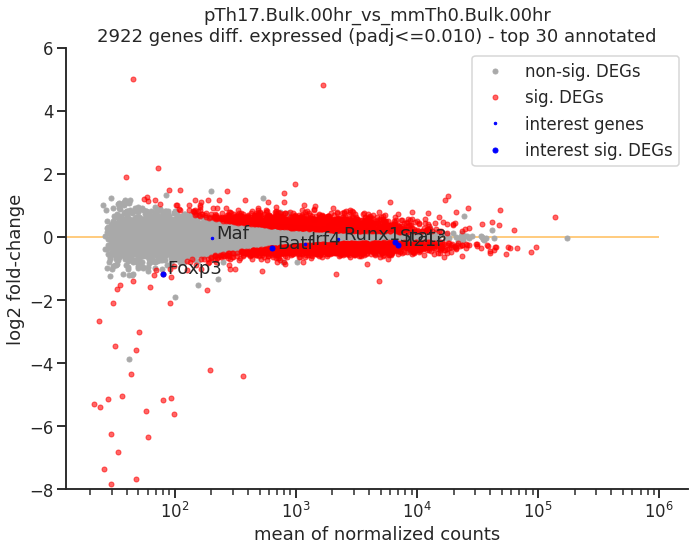

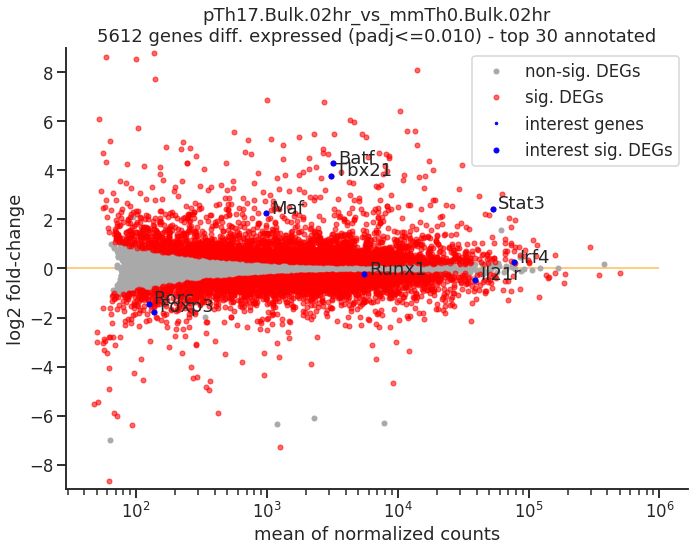

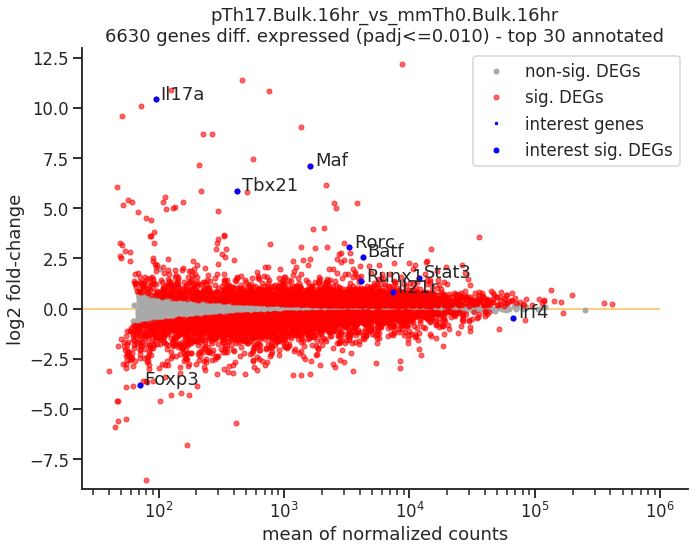

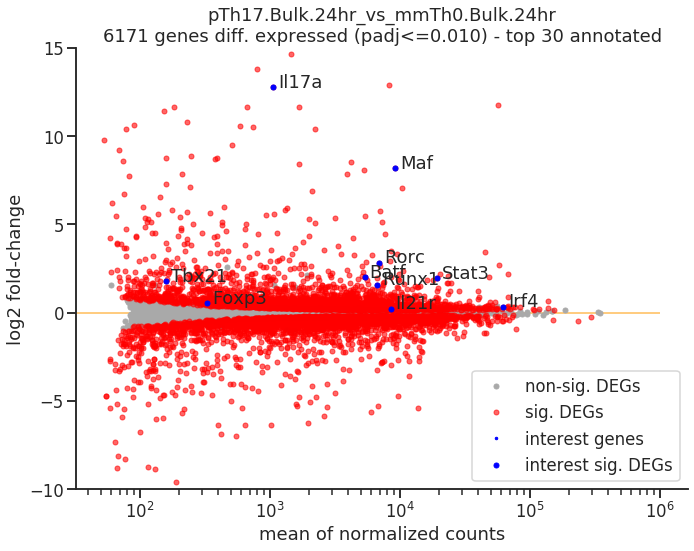

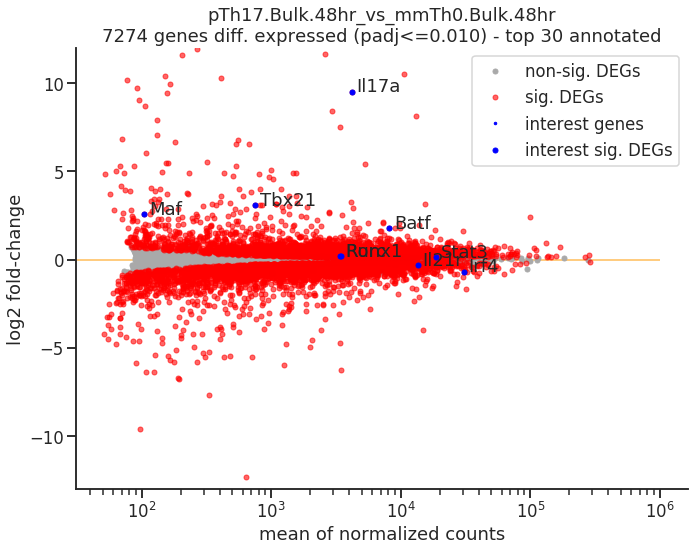

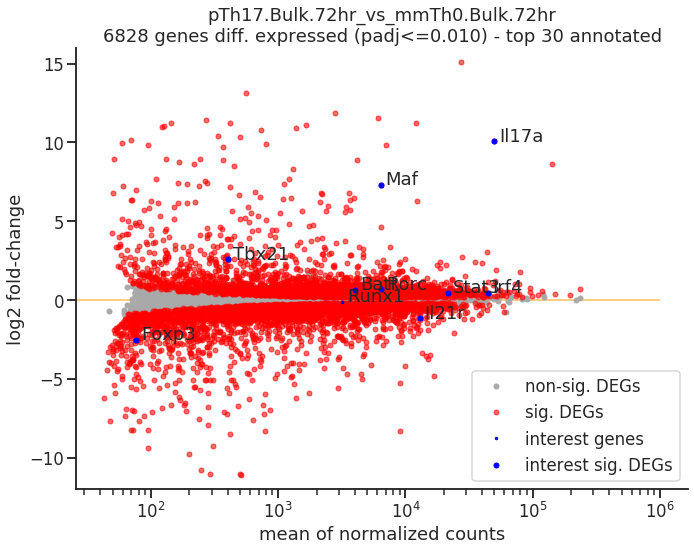

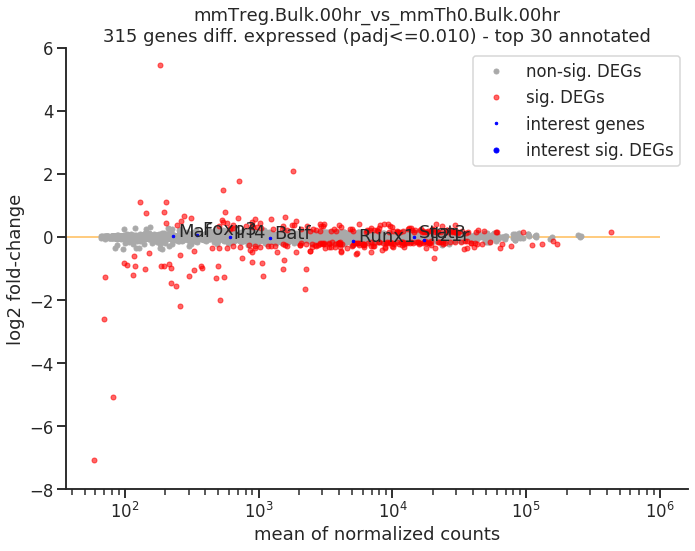

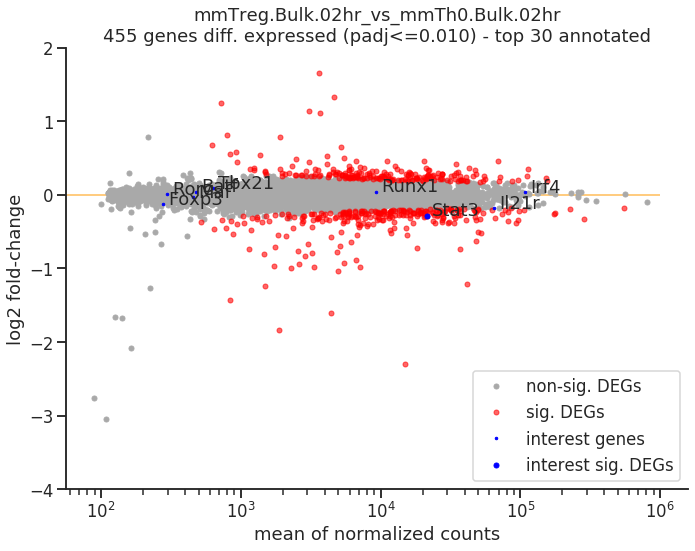

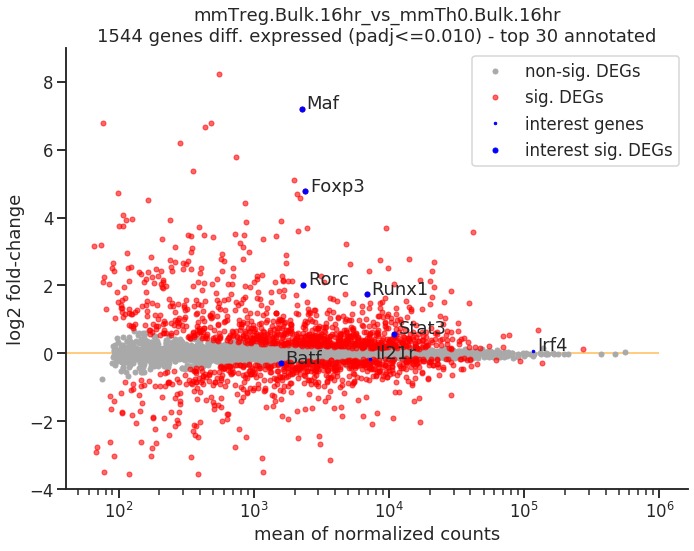

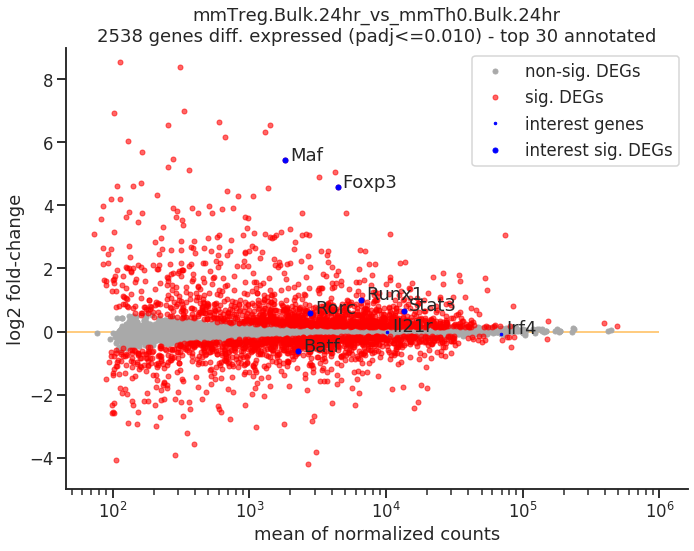

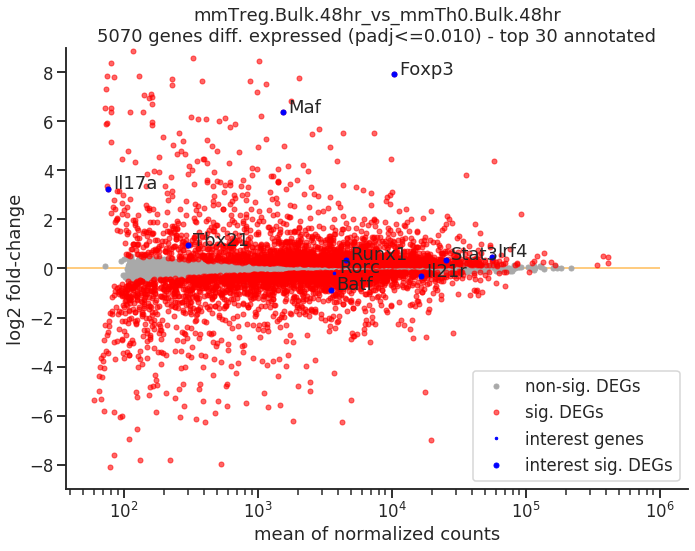

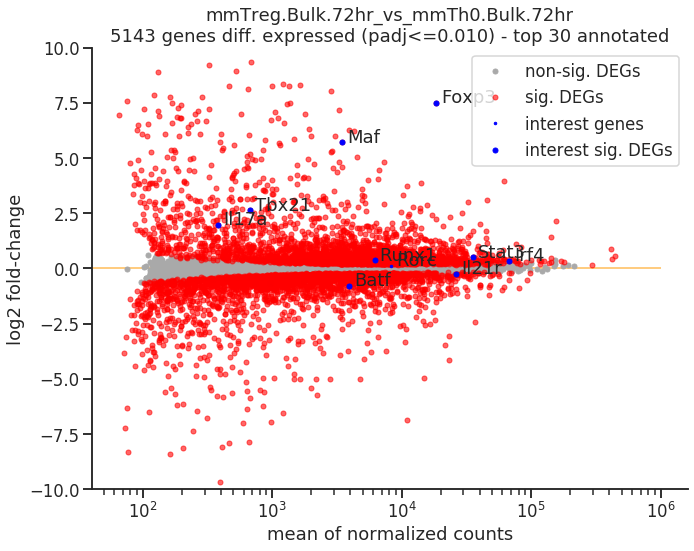

In [3]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
comparisons = [
     'Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr',
     'pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     'pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr',  
     'pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr',
     'mmTreg.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'mmTreg.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'mmTreg.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'mmTreg.Bulk.24hr_vs_mmTh0.Bulk.24hr', 
     'mmTreg.Bulk.48hr_vs_mmTh0.Bulk.48hr', 
     'mmTreg.Bulk.72hr_vs_mmTh0.Bulk.72hr'
]

data_dir = '/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values,'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values,'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue',
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
    plt.savefig("/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/degs.%s.with_genes.annotated_plot_MA.png" % comparison)
    plt.savefig("/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/degs.%s.with_genes.annotated_plot_MA.pdf" % comparison)
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    
    # print table of values 
#     print ("======", comparison, "======")
#     display(df_annotate) 



DE analysis for Th17_sorted for 72hr timepoint

In [2]:
import re
import pandas as pd

comp_files = {
    'Th17.Sorted.72hr': [
        '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Sorted.rep1.star2.featurecounts.counts.txt',
        '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Sorted.rep2.star2.featurecounts.counts.txt',
        '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Sorted.rep3.star2.featurecounts.counts.txt',
        '/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.72hr.Sorted.rep4.star2.featurecounts.counts.txt',
        '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep1.star2.featurecounts.counts.txt',
        '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep2.star2.featurecounts.counts.txt',
        '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep3.star2.featurecounts.counts.txt',
        '/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep4.star2.featurecounts.counts.txt'
        
    ]
}

def clean_count_column(s):
    items = ['sorted', 'Sorted']
    name = '.'.join(s.split('/')[-1].split('.')[:3])
    if name.startswith('mm'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated_sorted','.Sorted').replace('h.','hr.').split('.')[:4])
        else:
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated','.Sorted').replace('h.','hr.').split('.')[:4])
        
    else:
        if any(i in s for i in items):
            split_words = '.'.join(s.split('.')[1:3])
            rev_words = '.'.join(list(reversed(s.split('.')[1:3])))
            return '.'.join(s.split('/')[-1].replace(split_words, rev_words).split('.')[:4])
        else:
            s = re.sub('17.', '17.Sorted.', s)
            return '.'.join(s.split('/')[-1].split('.')[:4])
        

for comp, files in comp_files.items():
    df = None
    for f in files:
        df_tmp = pd.read_csv(f, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_count_column(f)]
        if df is None:
            df = df_tmp.loc[:, ['Chr', 'Start', 'End'] + [df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')

    df.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/%s.counts.txt' % comp, sep='\t')

In [1]:
%%bash
mkdir -p /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -pnew,all \
    --array=0-1 \
    --mem 16G \
    -o /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries.%a.out \
    <<'EOF'
#!/bin/bash
COMPARISONS=( \
     Th17.Sorted.72hr-mmTh0.Sorted.72hr
)

COMPARISON=${COMPARISONS[${SLURM_ARRAY_TASK_ID}]}
TREAT=$(echo $COMPARISON | cut -d"-" -f1)
CONTROL=$(echo $COMPARISON | cut -d"-" -f2)
FACTOR=$(echo $COMPARISON | cut -d"-" -f1)
Rscript /data/reddylab/Revathy/dev/scripts/rnaseq_dge.deseq2_v2.R \
    --treatments $(echo ${TREAT}.rep{1,2,3,4}) \
    --controls $(echo ${CONTROL}.rep{1,2,3,4}) \
    --lfcShrink apeglm \
    --counts-skip-ncols 3 \
    --outdir /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries \
    --counts /data/reddylab/Revathy/dev/rna-seq_Siklenka/${FACTOR}.counts.txt
    
EOF



Submitted batch job 24108531


In [4]:
%%bash
FDR=0.05
COMPARISONS=( \ 
     Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr
)
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.txt |  cut -d. -f1 > ${COMP}.expressed_genes.txt 
    
    # Save significant upreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3>0)){print $1}}' |  cut -d. -f1 > ${COMP}.upreg_genes.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.txt |  awk -vFDR=${FDR} '{if(($NF<FDR) && ($3<0)){print $1}}' |  cut -d. -f1 > ${COMP}.downreg_genes.txt 

done

In [5]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for ii in $(/bin/ls -1 *_vs_*hr.txt | /bin/grep -v with_genes);
do
    python /data/reddylab/Alex/collab/20180628_Layden/processing/rna_seq/scripts/mm10.rnaseq_dge_deseq2.add_gene_names.py \
        ${ii} \
        ${ii/.txt/.with_genes.txt}
done

In [6]:
%%bash
FDR=0.05
COMPARISONS=( \
   Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr
)
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
for COMP in ${COMPARISONS[@]};
do
    # Save expressed genes (more than 5 normalized counts)
    tail -n+2 ${COMP}.with_genes.txt |  awk '{print $NF}' > ${COMP}.expressed_genes.symbols.txt 

    # Save significant upreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3>0)){print $NF}}' > ${COMP}.upreg_genes.symbols.txt 

    # Save significant downreg genes
    tail -n+2 ${COMP}.with_genes.txt |  awk -vFDR=${FDR} '{if(($(NF-1)<FDR) && ($3<0)){print $NF}}' > ${COMP}.downreg_genes.symbols.txt 

done

In [7]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
cd /data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries
module load ImageMagick/7.0.1-gcb01
for ii in $(/bin/ls -1 *.pdf);
do
    convert ${ii} ${ii/.pdf/.png}
done

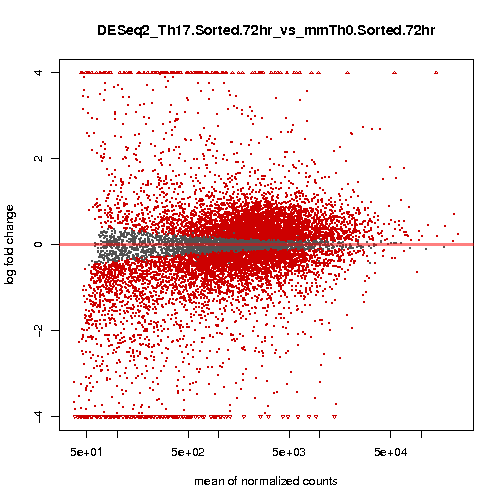

In [8]:
from IPython.display import display, Image

display(Image("/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.png" ))

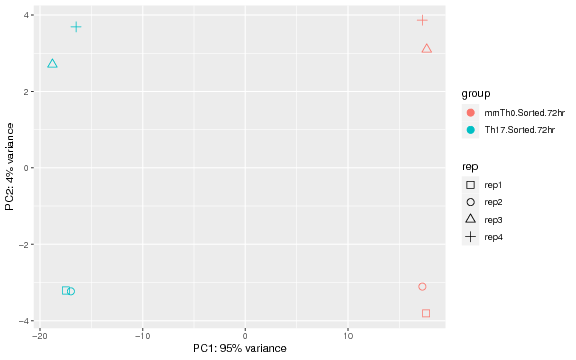

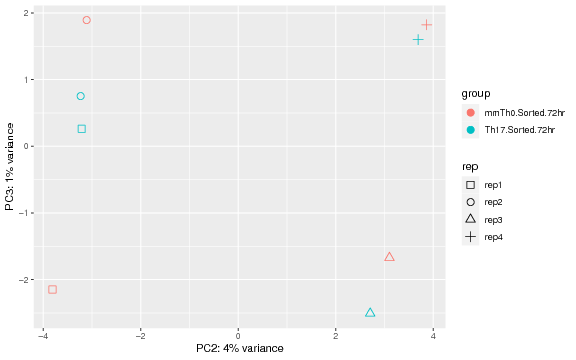

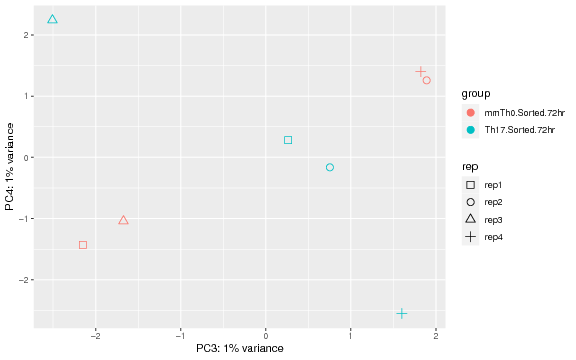

In [9]:
from IPython.display import display, Image

PC = [
    'pca.1_vs_2',
    'pca.2_vs_3',
    'pca.3_vs_4'
]

for p in PC:
    display(Image("/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries/Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr.%s.png" % p))

====== Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr ======


,Unnamed: 0,baseMean,log2FoldChange,lfcSE,pvalue,padj,GeneName,GeneType
0,ENSMUSG00000025929.4,54584.959953,10.610688,0.278660,0.0,0.0,Il17a,protein_coding
21,ENSMUSG00000050953.10,1703.149444,3.142903,0.083809,0.0,0.0,Gja1,protein_coding
22,ENSMUSG00000020077.14,18452.779701,1.941615,0.045274,0.0,0.0,Srgn,protein_coding
23,ENSMUSG00000060600.15,2903.718528,-3.897494,0.080834,0.0,0.0,Eno3,protein_coding
24,ENSMUSG00000020841.5,26903.012369,2.752175,0.072700,0.0,0.0,Cpd,protein_coding
25,ENSMUSG00000020644.8,3737.994331,3.421136,0.059775,0.0,0.0,Id2,protein_coding
26,ENSMUSG00000035105.5,9719.416922,5.753995,0.095846,0.0,0.0,Egln3,protein_coding
27,ENSMUSG00000076617.9,4840.804970,-4.980754,0.107890,0.0,0.0,Ighm,IG_C_gene
20,ENSMUSG00000047139.9,4087.329774,6.203252,0.096703,0.0,0.0,Cd24a,protein_coding
29,ENSMUSG00000068220.5,39961.338606,2.696862,0.070257,0.0,0.0,Lgals1,protein_coding


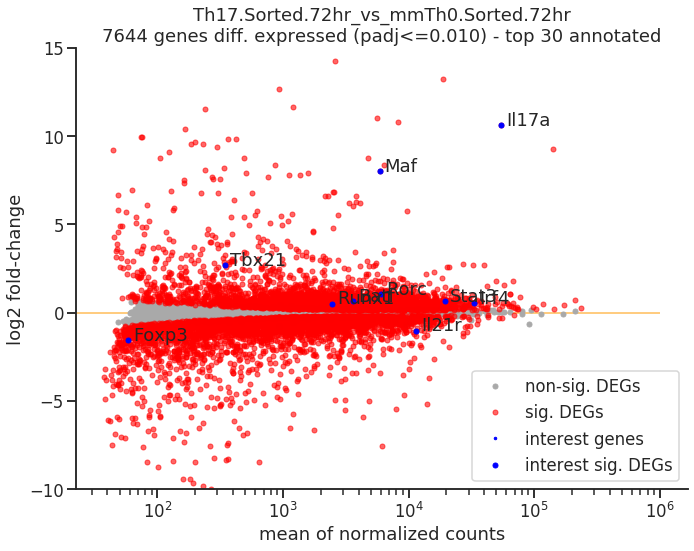

In [4]:
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Config
pval_thres = 0.01
top_to_report = 30

special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
comparisons = [
     
     'Th17.Sorted.72hr_vs_mmTh0.Sorted.72hr',
     
]

data_dir = '/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries'

for comparison in comparisons:
    df = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, comparison),
                    sep="\t")
#     df_gene_name_type = pd.read_csv("/data/reddylab/Reference_Data/Refseq/GRCh38/GRCh38_latest_genomic.gene_name_gene_type.txt",
#                     sep="\t",
#                     names=['GeneName', 'GeneType'])
#     df = df.merge(df_gene_name_type, on='GeneName')
#     pseudogene_types = set(df.loc[["pseudogene" in gt for gt in df['GeneType'].values], 'GeneType'].values)
#     df = df[~df.GeneType.isin(pseudogene_types)]
#     df = df[df.GeneType.isin(['protein_coding'])]
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    df_non_sig = df[~(df.padj<pval_thres) & (~df.GeneName.isin(special_genes))]
    ax.set_xscale('log')
    ax.plot(df_non_sig['baseMean'].values, 
            df_non_sig['log2FoldChange'].values, 
            'o', color='darkgrey', label='non-sig. DEGs', markersize=5)

    
    ylims = [np.ceil(df['log2FoldChange'].min()-1), 
             np.floor(df['log2FoldChange'].max()+1)]
    df_sig = df[df.padj<=pval_thres]
    ax.plot(df_sig['baseMean'].values, df_sig['log2FoldChange'].values, 'ro', alpha=0.6, label='sig. DEGs', markersize=5)

    # Annotate the top top_to_report
    df_annotate = df_sig.sort_values(by='padj', ascending=True).head(top_to_report)
    df_annotate_table = df_sig.sort_values(by='padj', ascending=True)

#     if np.count_nonzero(df_annotate['log2FoldChange']>0)==0:
#         df_annotate = pd.concat([df_annotate.head(top_to_report-10), df_sig[df_sig['log2FoldChange']>0].head(10)])
#     ax.plot(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, 'ro', label='sig. DEGs')

#     for x, y, t in zip(df_annotate['baseMean'].values, df_annotate['log2FoldChange'].values, df_annotate['GeneName'].values) :
#         ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
#                     textcoords='offset points')

    # Annotate in particular IL1RN, HBG and EP300
    df_annotate_selected = df[df.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='.', linestyle = 'None', alpha=1, label='interest genes', markersize=5)
    for x, y, t in zip(df_annotate_selected['baseMean'].values,
                       df_annotate_selected['log2FoldChange'].values, 
                       df_annotate_selected['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')
    df_annotate_selected = df_sig[df_sig.GeneName.isin(special_genes)]
    ax.plot(df_annotate_selected['baseMean'].values, 
            df_annotate_selected['log2FoldChange'].values,color='blue', 
            marker='o', linestyle = 'None', alpha=1, label='interest sig. DEGs', markersize=5)
    
    

    plt.ylim(ylims)
    plt.xlabel("mean of normalized counts")
    plt.ylabel("log2 fold-change")
    plt.title("%s\n%d genes diff. expressed (padj<=%.3f) - top %d annotated" % (comparison, 
                                                                                np.count_nonzero(df.padj<=pval_thres), 
                                                                                pval_thres, 
                                                                                top_to_report))
    plt.hlines(0, 0, 1e6, color='#ffcc80', linewidth =2 )
    plt.legend()

    # Remove spines and tight the layout
    simpleaxis(ax)
    plt.tight_layout()
    
#     # Save annotated MA plot
    plt.savefig("/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/degs.%s.with_genes.annotated_plot_MA.png" % comparison)
    
     # Save annotated genes without pseudogenes
    df_annotate_table.to_csv("/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/%s.with_genes.sig_DE.txt" % comparison,
                       sep='\t',
                       index=False)
    
    # print table of values 
    print ("======", comparison, "======")
    display(df_annotate) 


